# **Packages 📚**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import missingno
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score,coverage_error
import matplotlib.pyplot as mp
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **Data Preprocessing**

In [ ]:
#Load data
from google.colab import drive
drive.mount('drive', force_remount=True)

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/seo_scraped_data.csv')
print(df.shape)
df.head(5)

Mounted at drive
(1427, 28)


keyword  rank  \
0  How to maintain a healthy weight     1   
1  How to maintain a healthy weight     2   
2  How to maintain a healthy weight     3   
3  How to maintain a healthy weight     4   
4  How to maintain a healthy weight     5   

                                               title  snippet  \
0                  Maintain a Healthy Weight - NHLBI      NaN   
1  Maintaining a Healthy Weight | National Instit...      NaN   
2                    About Healthy Weight and Growth      NaN   
3                  Tips to Maintain a Healthy Weight      NaN   
4                      Keeping a Healthy Body Weight      NaN   

                                                link  total_words  h1_num  \
0  https://www.nhlbi.nih.gov/health/educational/l...          603       7   
1  https://www.nia.nih.gov/health/healthy-eating-...         1402       1   
2  https://www.cdc.gov/healthy-weight-growth/abou...          953       1   
3  https://reverehealth.com/live-better/tips-to-m...          974       1   
4  https://www.heart.org/en/healthy-living/health...          924       1   

   h1_len  h2_num  h2_len  ...                                   h2_kcount  \
0     5.0       3    3.00  ...                                         NaN   
1     4.0      10    7.10  ...  {'healthy': 4, 'maintain': 1, 'weight': 6}   
2     5.0      11    2.73  ...                 {'healthy': 3, 'weight': 2}   
3     6.0       4   20.00  ...               {'healthy': 1, 'maintain': 1}   
4     5.0      13    3.77  ...                 {'healthy': 2, 'weight': 2}   

                     h3_kcount                                      p_kcount  \
0                          NaN  {'healthy': 11, 'maintain': 4, 'weight': 13}   
1                          NaN  {'healthy': 11, 'maintain': 5, 'weight': 24}   
2                          NaN  {'healthy': 15, 'maintain': 1, 'weight': 14}   
3                          NaN   {'healthy': 8, 'maintain': 5, 'weight': 16}   
4  {'healthy': 1, 'weight': 1}   {'healthy': 5, 'maintain': 1, 'weight': 10}   

                                     a_kcount  footer_kcount  \
0                 {'healthy': 1, 'weight': 3}            NaN   
1  {'healthy': 5, 'maintain': 1, 'weight': 3}            NaN   
2               {'healthy': 24, 'weight': 25}            NaN   
3                                         NaN            NaN   
4               {'healthy': 18, 'weight': 11}            NaN   

                                  link_kcount                 imalt_kcount  \
0                                         NaN  {'healthy': 2, 'weight': 2}   
1                 {'healthy': 2, 'weight': 1}                          NaN   
2                 {'healthy': 1, 'weight': 1}               {'healthy': 1}   
3  {'healthy': 1, 'maintain': 1, 'weight': 1}               {'healthy': 2}   
4                 {'healthy': 3, 'weight': 2}  {'healthy': 1, 'weight': 2}   

  meta_desc_len                                        meta_kcount ti_used  
0             0                                                NaN       1  
1             4                {'a': 1, 'healthy': 1, 'weight': 1}       1  
2             5                        {'healthy': 1, 'weight': 1}       1  
3             6  {'to': 1, 'maintain': 1, 'weight': 1, 'a': 1, ...       1  
4             5                {'a': 1, 'healthy': 1, 'weight': 1}       1  

[5 rows x 28 columns]

In [ ]:
#Num of keywords
keywords = df['keyword'].unique()
print('The number of keywords: ', len(keywords))

The number of keywords:  150


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   keyword        1427 non-null   object 
 1   rank           1427 non-null   int64  
 2   title          1427 non-null   object 
 3   snippet        0 non-null      float64
 4   link           1427 non-null   object 
 5   total_words    1427 non-null   int64  
 6   h1_num         1427 non-null   int64  
 7   h1_len         1314 non-null   float64
 8   h2_num         1427 non-null   int64  
 9   h2_len         1278 non-null   float64
 10  h3_num         1427 non-null   int64  
 11  h3_len         1165 non-null   float64
 12  header_total   1427 non-null   int64  
 13  img_count      1427 non-null   int64  
 14  internalLinks  1427 non-null   int64  
 15  externalLinks  1427 non-null   int64  
 16  total_link     1427 non-null   int64  
 17  h1_kcount      1155 non-null   object 
 18  h2_kcoun

In [ ]:
print(df.columns)

Index(['keyword', 'rank', 'title', 'snippet', 'link', 'total_words', 'h1_num',
       'h1_len', 'h2_num', 'h2_len', 'h3_num', 'h3_len', 'header_total',
       'img_count', 'internalLinks', 'externalLinks', 'total_link',
       'h1_kcount', 'h2_kcount', 'h3_kcount', 'p_kcount', 'a_kcount',
       'footer_kcount', 'link_kcount', 'imalt_kcount', 'meta_desc_len',
       'meta_kcount', 'ti_used'],
      dtype='object')


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Num of results scraped for each keyword (due to security threat like Ddos some web might prevent us from scraping -> skip dat web)
grouped_df = df.groupby('keyword')
for k in keywords:
  print(k, ' : ', grouped_df.get_group(k).shape[0])

How to maintain a healthy weight  :  8
Best exercises for heart health  :  10
Tips for lowering cholesterol naturally  :  10
How to boost the immune system  :  10
Natural remedies for better sleep  :  10
What are the early signs of diabetes?  :  10
How to manage high blood pressure  :  10
Symptoms of thyroid problems  :  9
Best diet for managing arthritis  :  10
How to treat acid reflux at home  :  10
How to have clear skin naturally  :  7
Best anti-aging skin care routines  :  9
How to reduce acne breakouts  :  10
Home remedies for dry skin  :  9
Tips for healthy hair and nails  :  9
How to reduce stress quickly  :  10
Techniques for managing anxiety  :  10
Best therapies for depression  :  10
How to deal with panic attacks  :  10
Signs of mental health issues  :  10
How to ease menstrual cramps  :  10
Pregnancy health tips  :  10
How to detect signs of breast cancer  :  9
Health tips for menopausal women  :  9
Best exercises during pregnancy  :  10
How to prevent male hair loss  :  1

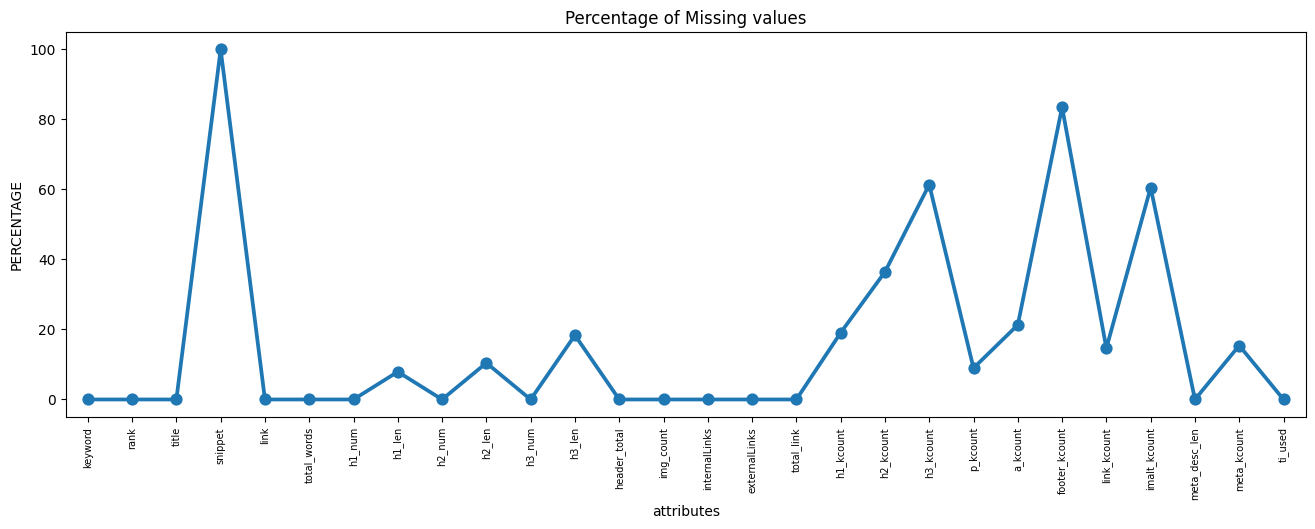

In [ ]:
# Assuming df is your DataFrame
# Visualizing the percentage of missing values:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['attributes', 'percent_missing']

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='attributes', y='percent_missing', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
#Take out columns that are stored in dict format
kcount = []
for c in df.columns:
  if "kcount" in c:
    kcount.append(c)

print(kcount)

['h1_kcount', 'h2_kcount', 'h3_kcount', 'p_kcount', 'a_kcount', 'footer_kcount', 'link_kcount', 'imalt_kcount', 'meta_kcount']


In [ ]:
# Change the data from those columns to the sum of occurence
for index, row in df.iterrows():
  for ck in kcount:
    strings = re.findall(r'\d+', str(row[ck]))
    a = [int(x) for x in strings]
    df.at[index, ck] = sum(a)

In [ ]:
#drop column sinppet
df.drop(columns= ['snippet'], inplace=True)
df.head()


keyword  rank  \
0  How to maintain a healthy weight     1   
1  How to maintain a healthy weight     2   
2  How to maintain a healthy weight     3   
3  How to maintain a healthy weight     4   
4  How to maintain a healthy weight     5   

                                               title  \
0                  Maintain a Healthy Weight - NHLBI   
1  Maintaining a Healthy Weight | National Instit...   
2                    About Healthy Weight and Growth   
3                  Tips to Maintain a Healthy Weight   
4                      Keeping a Healthy Body Weight   

                                                link  total_words  h1_num  \
0  https://www.nhlbi.nih.gov/health/educational/l...          603       7   
1  https://www.nia.nih.gov/health/healthy-eating-...         1402       1   
2  https://www.cdc.gov/healthy-weight-growth/abou...          953       1   
3  https://reverehealth.com/live-better/tips-to-m...          974       1   
4  https://www.heart.org/en/healthy-living/health...          924       1   

   h1_len  h2_num  h2_len  h3_num  ...  h2_kcount  h3_kcount  p_kcount  \
0     5.0       3    3.00       0  ...          0          0        28   
1     4.0      10    7.10       0  ...         11          0        40   
2     5.0      11    2.73       2  ...          5          0        30   
3     6.0       4   20.00      15  ...          2          0        29   
4     5.0      13    3.77       4  ...          4          2        16   

   a_kcount  footer_kcount  link_kcount imalt_kcount meta_desc_len  \
0         4              0            0            4             0   
1         9              0            3            0             4   
2        49              0            2            1             5   
3         0              0            3            2             6   
4        29              0            5            3             5   

  meta_kcount ti_used  
0           0       1  
1           3       1  
2           2       1  
3           5       1  
4           3       1  

[5 rows x 27 columns]

In [ ]:
df.head(5)

keyword  rank  \
0  How to maintain a healthy weight     1   
1  How to maintain a healthy weight     2   
2  How to maintain a healthy weight     3   
3  How to maintain a healthy weight     4   
4  How to maintain a healthy weight     5   

                                               title  \
0                  Maintain a Healthy Weight - NHLBI   
1  Maintaining a Healthy Weight | National Instit...   
2                    About Healthy Weight and Growth   
3                  Tips to Maintain a Healthy Weight   
4                      Keeping a Healthy Body Weight   

                                                link  total_words  h1_num  \
0  https://www.nhlbi.nih.gov/health/educational/l...          603       7   
1  https://www.nia.nih.gov/health/healthy-eating-...         1402       1   
2  https://www.cdc.gov/healthy-weight-growth/abou...          953       1   
3  https://reverehealth.com/live-better/tips-to-m...          974       1   
4  https://www.heart.org/en/healthy-living/health...          924       1   

   h1_len  h2_num  h2_len  h3_num  ...  h2_kcount  h3_kcount  p_kcount  \
0     5.0       3    3.00       0  ...          0          0        28   
1     4.0      10    7.10       0  ...         11          0        40   
2     5.0      11    2.73       2  ...          5          0        30   
3     6.0       4   20.00      15  ...          2          0        29   
4     5.0      13    3.77       4  ...          4          2        16   

   a_kcount  footer_kcount  link_kcount imalt_kcount meta_desc_len  \
0         4              0            0            4             0   
1         9              0            3            0             4   
2        49              0            2            1             5   
3         0              0            3            2             6   
4        29              0            5            3             5   

  meta_kcount ti_used  
0           0       1  
1           3       1  
2           2       1  
3           5       1  
4           3       1  

[5 rows x 27 columns]

In [ ]:
# Define the path within your Google Drive where the CSV will be saved
file_path = '/content/drive/My Drive/processed_data.csv'

# Save the DataFrame to a CSV file without the index
df.to_csv(file_path, index=False)

print(f"The data has been successfully saved to '{file_path}'")

The data has been successfully saved to '/content/drive/My Drive/processed_data.csv'


# **EXPLORATION DATA ANALYSIS**

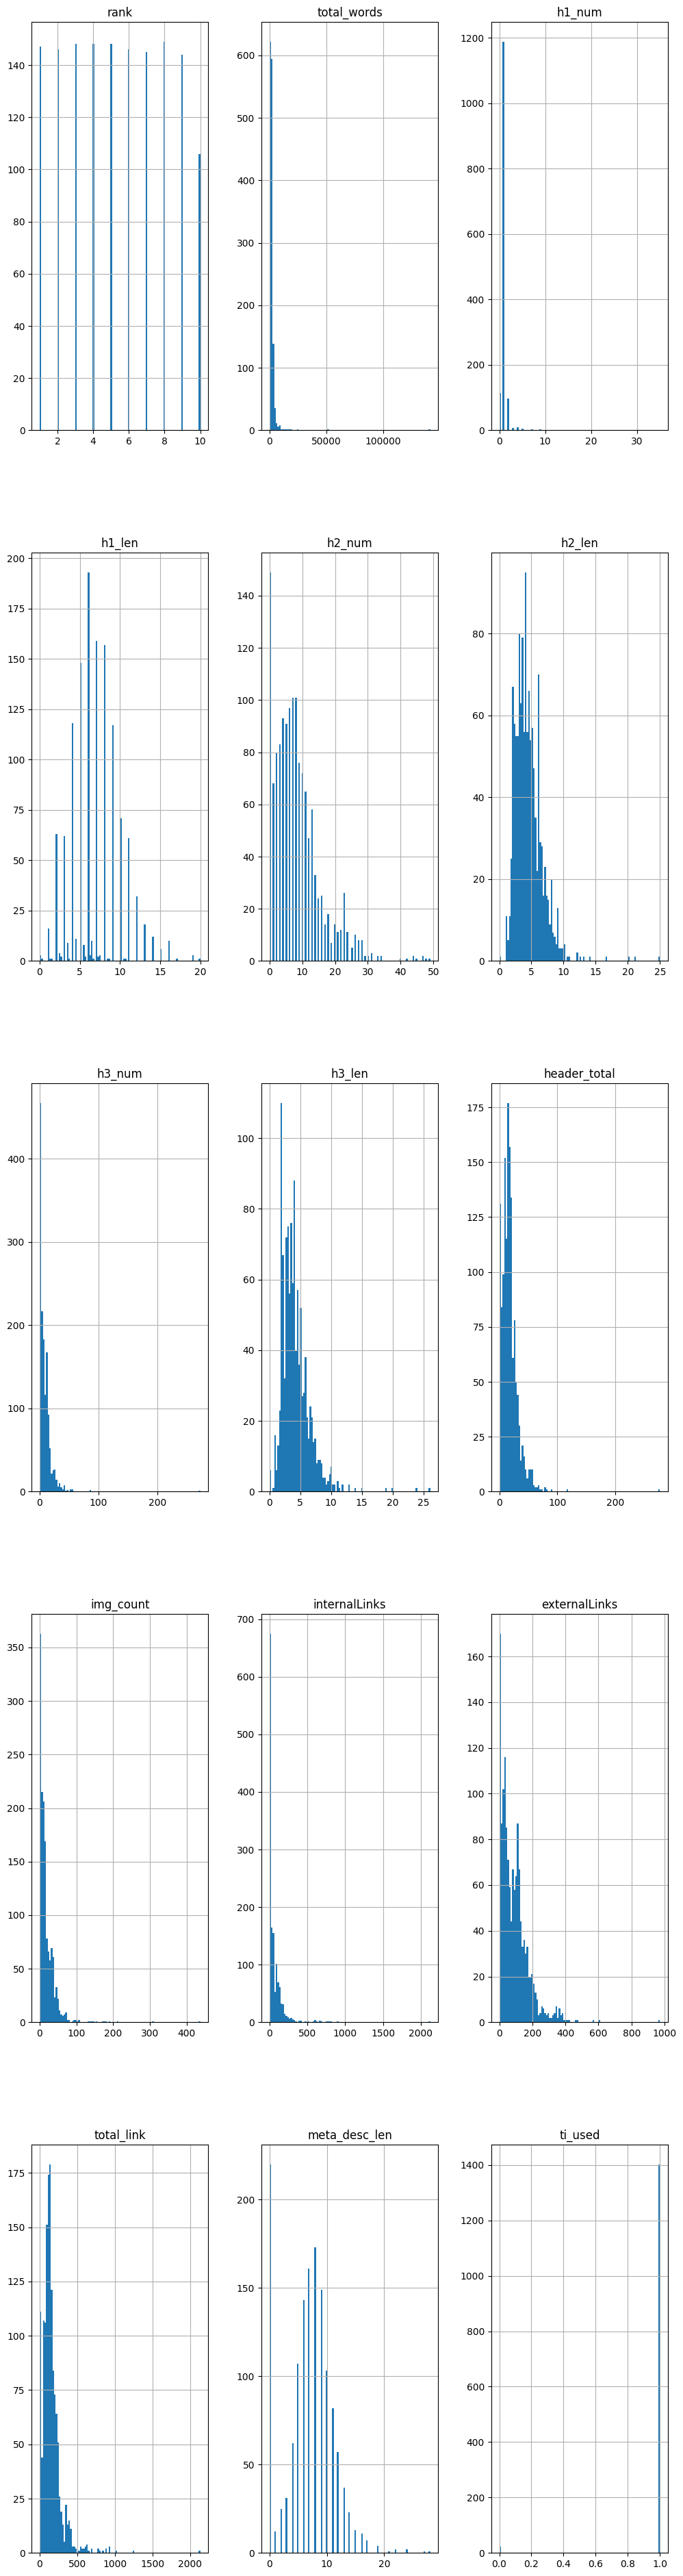

In [ ]:
# Histogram for all columns
%matplotlib inline
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(df.select_dtypes(include=np.number).columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df.hist(column = df.select_dtypes(include=np.number).columns[i], bins = 100, ax=axis)
        i = i+1

In [ ]:
#Fill all missing values from feature columns with 0
df[['h1_len','h2_len','h3_len']] = df[['h1_len','h2_len','h3_len']].fillna(0)
df.isnull().sum()

keyword          0
rank             0
title            0
link             0
total_words      0
h1_num           0
h1_len           0
h2_num           0
h2_len           0
h3_num           0
h3_len           0
header_total     0
img_count        0
internalLinks    0
externalLinks    0
total_link       0
h1_kcount        0
h2_kcount        0
h3_kcount        0
p_kcount         0
a_kcount         0
footer_kcount    0
link_kcount      0
imalt_kcount     0
meta_desc_len    0
meta_kcount      0
ti_used          0
dtype: int64

In [ ]:
import seaborn as sns

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# **MODEL BUILDING**

In [ ]:
# Change the dataframe index to keyword
train_processed = df.copy()
train_processed.set_index("keyword",inplace=True)
train_processed.head(5)

rank  \
keyword                                  
How to maintain a healthy weight     1   
How to maintain a healthy weight     2   
How to maintain a healthy weight     3   
How to maintain a healthy weight     4   
How to maintain a healthy weight     5   

                                                                              title  \
keyword                                                                               
How to maintain a healthy weight                  Maintain a Healthy Weight - NHLBI   
How to maintain a healthy weight  Maintaining a Healthy Weight | National Instit...   
How to maintain a healthy weight                    About Healthy Weight and Growth   
How to maintain a healthy weight                  Tips to Maintain a Healthy Weight   
How to maintain a healthy weight                      Keeping a Healthy Body Weight   

                                                                               link  \
keyword                                                                               
How to maintain a healthy weight  https://www.nhlbi.nih.gov/health/educational/l...   
How to maintain a healthy weight  https://www.nia.nih.gov/health/healthy-eating-...   
How to maintain a healthy weight  https://www.cdc.gov/healthy-weight-growth/abou...   
How to maintain a healthy weight  https://reverehealth.com/live-better/tips-to-m...   
How to maintain a healthy weight  https://www.heart.org/en/healthy-living/health...   

                                  total_words  h1_num  h1_len  h2_num  h2_len  \
keyword                                                                         
How to maintain a healthy weight          603       7     5.0       3    3.00   
How to maintain a healthy weight         1402       1     4.0      10    7.10   
How to maintain a healthy weight          953       1     5.0      11    2.73   
How to maintain a healthy weight          974       1     6.0       4   20.00   
How to maintain a healthy weight          924       1     5.0      13    3.77   

                                  h3_num  h3_len  ...  h2_kcount  h3_kcount  \
keyword                                           ...                         
How to maintain a healthy weight       0    0.00  ...          0          0   
How to maintain a healthy weight       0    0.00  ...         11          0   
How to maintain a healthy weight       2    3.50  ...          5          0   
How to maintain a healthy weight      15    5.47  ...          2          0   
How to maintain a healthy weight       4    9.50  ...          4          2   

                                  p_kcount  a_kcount  footer_kcount  \
keyword                                                               
How to maintain a healthy weight        28         4              0   
How to maintain a healthy weight        40         9              0   
How to maintain a healthy weight        30        49              0   
How to maintain a healthy weight        29         0              0   
How to maintain a healthy weight        16        29              0   

                                 link_kcount imalt_kcount meta_desc_len  \
keyword                                                                   
How to maintain a healthy weight           0            4             0   
How to maintain a healthy weight           3            0             4   
How to maintain a healthy weight           2            1             5   
How to maintain a healthy weight           3            2             6   
How to maintain a healthy weight           5            3             5   

                                 meta_kcount ti_used  
keyword                                               
How to maintain a healthy weight           0       1  
How to maintain a healthy weight           3       1  
How to maintain a healthy weight           2       1  
How to maintain a healthy weight           5       1  
How to maintain a healthy weight           

In [ ]:
train_processed.dtypes

rank               int64
title             object
link              object
total_words        int64
h1_num             int64
h1_len           float64
h2_num             int64
h2_len           float64
h3_num             int64
h3_len           float64
header_total       int64
img_count          int64
internalLinks      int64
externalLinks      int64
total_link         int64
h1_kcount         object
h2_kcount         object
h3_kcount         object
p_kcount          object
a_kcount          object
footer_kcount     object
link_kcount       object
imalt_kcount      object
meta_desc_len      int64
meta_kcount       object
ti_used            int64
dtype: object

In [ ]:
# Set features (ALL)
features = train_processed.iloc[:,4:].columns.tolist()
print(features)
print(len(features))

'''
# Set features (selected)
features = ['internalLinks', 'a_kcount', 'h2_len', 'externalLinks', 'total_words', 'img_count']
print(features)
print(len(features))
'''
# Set target
target = 'rank'

['h1_num', 'h1_len', 'h2_num', 'h2_len', 'h3_num', 'h3_len', 'header_total', 'img_count', 'internalLinks', 'externalLinks', 'total_link', 'h1_kcount', 'h2_kcount', 'h3_kcount', 'p_kcount', 'a_kcount', 'footer_kcount', 'link_kcount', 'imalt_kcount', 'meta_desc_len', 'meta_kcount', 'ti_used']
22


In [ ]:
#train_processed[features] = train_processed[features].apply(pd.to_numeric)
#mean_data = train_processed.groupby('rank').mean()

train_processed[['rank','internalLinks']].groupby('rank').mean().plot()
#mean_data.plot(subplots = True, layout=(12,2), figsize=(12, 50))

#plt.subplots_adjust(hspace=0.25)
plt.xticks(train_processed['rank'].unique())
plt.show()

In [ ]:
#train_processed.groupby('rank').mean().astype(int)

<Axes: >

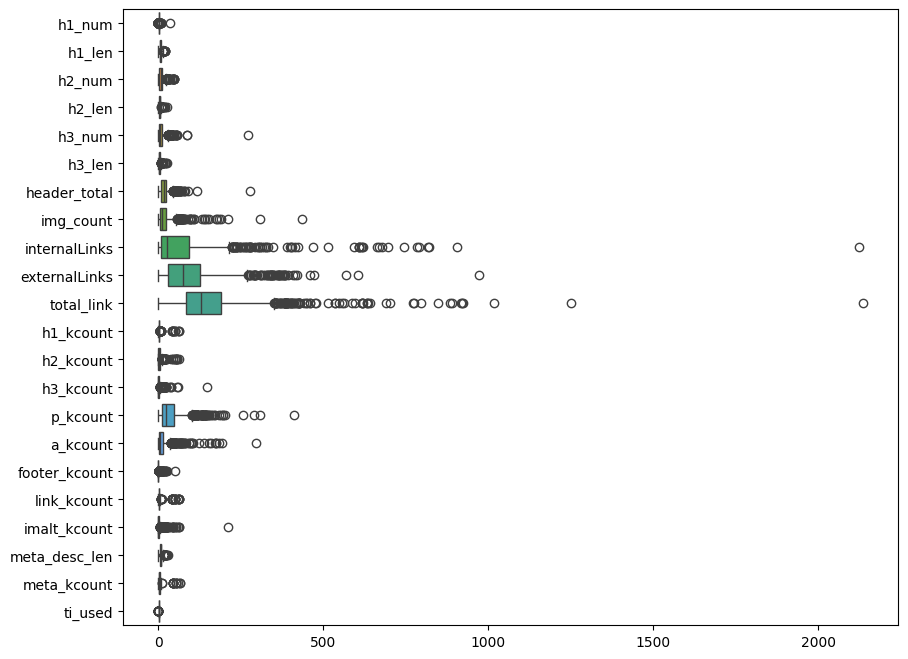

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df[features], orient="h")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_processed[features])
scaled_features = scaler.transform(train_processed[features])
print(scaled_features)

[[ 5.31318711 -0.37444958 -0.7407239  ... -1.62816874 -0.52443863
   0.13079068]
 [-0.0710605  -0.66792019  0.22182209 ... -0.67994028  0.05152899
   0.13079068]
 [-0.0710605  -0.37444958  0.35932866 ... -0.44288316 -0.14046022
   0.13079068]
 ...
 [-0.0710605  -0.37444958 -0.7407239  ... -0.44288316 -0.52443863
   0.13079068]
 [ 3.51843791 -0.19836721 -1.01573705 ...  0.97945953 -0.33244943
   0.13079068]
 [-0.0710605  -0.66792019 -1.01573705 ... -1.62816874 -0.52443863
   0.13079068]]


In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled_features)
pca_features = pca.transform(scaled_features)
pca_features.shape

(1427, 2)

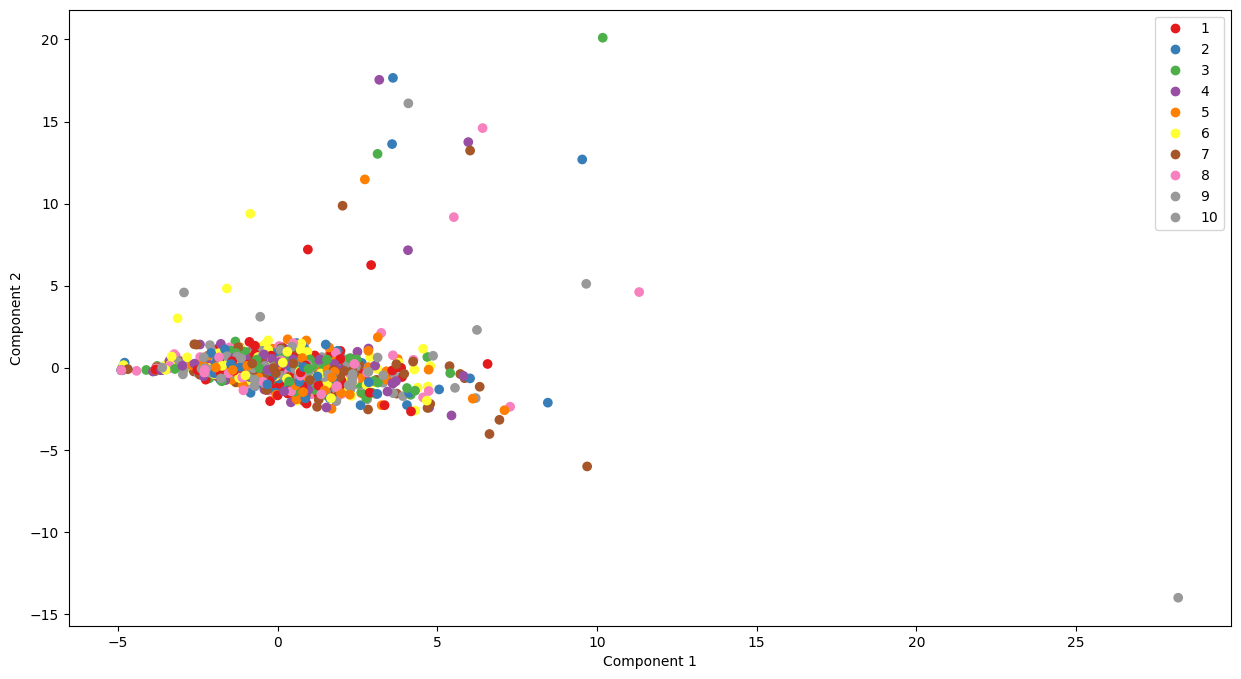

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
scatter = plt.scatter(x=pca_features[:,0], y=pca_features[:,1], c=df['rank'],cmap='Set1')
plt.legend(*scatter.legend_elements())
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [ ]:
#Split data
X,y = train_processed[features].apply(pd.to_numeric),train_processed[target].apply(pd.to_numeric)

xmain,xtest,ymain,ytest = train_test_split(X,y , random_state = 42,
                                   test_size=0.125,
                                   shuffle=True, stratify=y)
xtrain,xval,ytrain,yval = train_test_split(xmain,ymain, random_state = 100,
                                   test_size=0.125,
                                   shuffle=True, stratify=ymain)

In [ ]:
print(xtrain.shape,xval.shape,xtest.shape)

(1092, 22) (156, 22) (179, 22)


In [ ]:
# Get the the number of unique keywords in each dataset
get_group_size = lambda df: df.reset_index().groupby("keyword")['keyword'].count()

In [ ]:
df.reset_index().groupby("keyword")['keyword'].count()

keyword
Activities for seniors with limited mobility    10
Benefits of Pilates for beginners                8
Benefits of a plant-based diet                   9
Benefits of acupuncture for pain relief         10
Benefits of chiropractic adjustments             9
                                                ..
What are the best treatments for eczema?        10
What are the early signs of diabetes?           10
What causes chronic fatigue?                    10
What is Reiki and how does it work?              9
Yoga poses for beginners                         9
Name: keyword, Length: 150, dtype: int64

In [ ]:
train_groups = get_group_size(xtrain)
val_groups = get_group_size(xval)

In [ ]:
train_groups

keyword
Activities for seniors with limited mobility    7
Benefits of Pilates for beginners               7
Benefits of a plant-based diet                  6
Benefits of acupuncture for pain relief         9
Benefits of chiropractic adjustments            7
                                               ..
What are the best treatments for eczema?        5
What are the early signs of diabetes?           9
What causes chronic fatigue?                    5
What is Reiki and how does it work?             7
Yoga poses for beginners                        8
Name: keyword, Length: 150, dtype: int64

In [ ]:
val_groups

keyword
Activities for seniors with limited mobility    3
Benefits of a plant-based diet                  2
Benefits of cognitive therapy                   1
Benefits of omega-3 fatty acids                 1
Best daily supplements for health               2
                                               ..
What are the best treatments for eczema?        2
What are the early signs of diabetes?           1
What causes chronic fatigue?                    4
What is Reiki and how does it work?             1
Yoga poses for beginners                        1
Name: keyword, Length: 100, dtype: int64

# **LIGHTGBM**

In [ ]:
import lightgbm as lgb

In [ ]:
model_lgb = lgb.LGBMRanker(objective='lambdarank', metric='ndcg', verbose=10)
model_lgb.fit(xtrain, ytrain, group=train_groups, eval_set=[(xval, yval)], eval_group=[val_groups], eval_metric='ndcg@10')

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.725962
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.256672
[LightGBM] [Debug] init for col-wise cost 0.000405 seconds, init for row-wise cost 0.001446 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 1654
[LightGBM] [Info] Number of data points in the train set: 1092, number of used features: 22
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debu

LGBMRanker(metric='ndcg', objective='lambdarank', verbose=10)

In [ ]:
from sklearn.metrics import ndcg_score
y_test = np.asarray([ytest])
y_pred = np.asarray([model_lgb.predict(xtest)])
ndcg_score(y_test, y_pred)

0.85614570331844

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

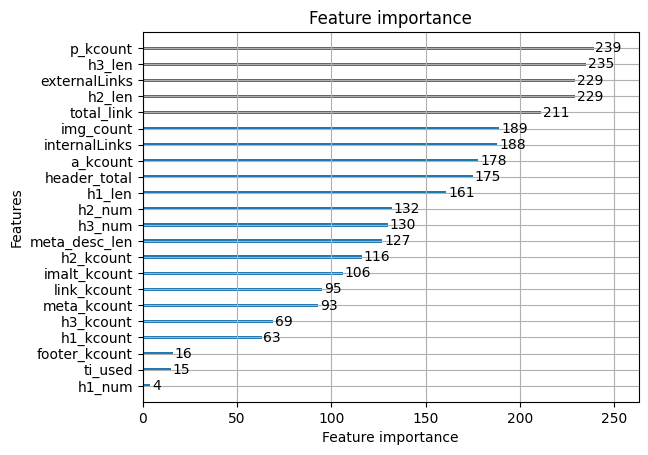

In [ ]:
import lightgbm as lightgbm
lightgbm.plot_importance(model_lgb)

# **XGBOOST**

In [ ]:
from xgboost import XGBRanker
model_xg = XGBRanker(objective='rank:ndcg')
model_xg.fit(xtrain,ytrain,group=train_groups,eval_set=[(xval,yval)],eval_group=[val_groups],eval_metric=['ndcg@10'], verbose=10)

[0]	validation_0-ndcg@10:0.93731
[10]	validation_0-ndcg@10:0.92816
[20]	validation_0-ndcg@10:0.93271
[30]	validation_0-ndcg@10:0.92796
[40]	validation_0-ndcg@10:0.92756
[50]	validation_0-ndcg@10:0.93176
[60]	validation_0-ndcg@10:0.93030
[70]	validation_0-ndcg@10:0.93496


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[80]	validation_0-ndcg@10:0.93857
[90]	validation_0-ndcg@10:0.94180
[99]	validation_0-ndcg@10:0.93685


XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None, device=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
          importance_type=None, interaction_constraints=None,
          learning_rate=None, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, multi_strategy=None, n_estimators=None,
          n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
#XGBOOST RESULT
from sklearn.metrics import ndcg_score
y_test = np.asarray([ytest])
y_pred = np.asarray([model_xg.predict(xtest)])
ndcg_score(y_test, y_pred)

0.8770700541060256

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

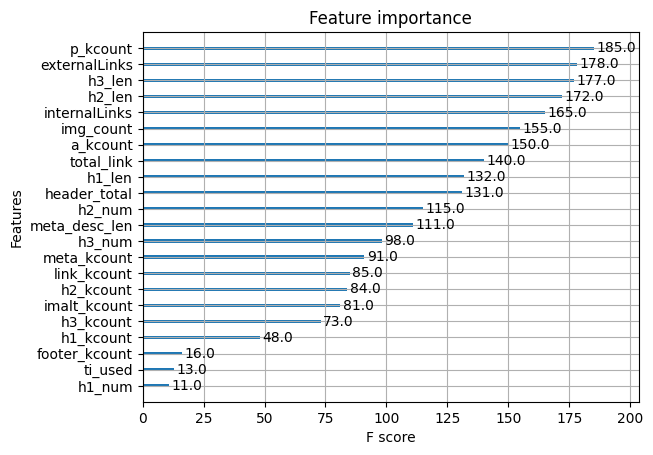

In [ ]:
import xgboost as xgboost
xgboost.plot_importance(model_xg)

# **MODEL EXPLAINIBILITY**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
import shap
def generate_shap_plots(ranker, X_train, feature_names, N=3):
    """
    Generates SHAP plots for a pre-trained LightGBM model.

    Parameters:
        ranker (lightgbm.Booster): A trained LightGBM model
        X_train (np.ndarray): The training data used to fit the model
        feature_names (List): list of feature names
        N (int): The number of plots to generate

    Returns:
        None
    """
    explainer = shap.Explainer(ranker, X_train, feature_names=feature_names)
    shap_values = explainer(X_train.iloc[:N])

    # Create a figure with 2 subplots
    #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    plt.figure(figsize=(20,20))

    # Plot the summary plot on the first subplot

    #plt.subplot(3, 1, 1)
    shap.summary_plot(shap_values, feature_names=feature_names, plot_type='bar')

    # Plot the feature importance plot on the second subplot
    #plt.subplot(3, 1, 2)
    shap.summary_plot(shap_values, feature_names=feature_names, plot_type='dot')

    #plt.subplot(3, 1, 3)
    #shap.summary_plot(shap_values, feature_names=feature_names, plot_type='violin')


    plt.show()

In [ ]:
from xgboost import XGBRanker
model_xg = XGBRanker(objective='rank:ndcg')
model_xg.fit(xtrain,ytrain,group=train_groups,eval_set=[(xval,yval)],eval_group=[val_groups],eval_metric=['ndcg@10'], verbose=10)

#XGBOOST RESULT
from sklearn.metrics import ndcg_score
y_test = np.asarray([ytest])
y_pred = np.asarray([model_xg.predict(xtest)])
ndcg_score(y_test, y_pred)

[0]	validation_0-ndcg@10:0.93731
[10]	validation_0-ndcg@10:0.92816
[20]	validation_0-ndcg@10:0.93271
[30]	validation_0-ndcg@10:0.92796
[40]	validation_0-ndcg@10:0.92756
[50]	validation_0-ndcg@10:0.93176
[60]	validation_0-ndcg@10:0.93030
[70]	validation_0-ndcg@10:0.93496
[80]	validation_0-ndcg@10:0.93857


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[90]	validation_0-ndcg@10:0.94180
[99]	validation_0-ndcg@10:0.93685


0.8770700541060256

 99%|===================| 1086/1092 [00:11<00:00]       

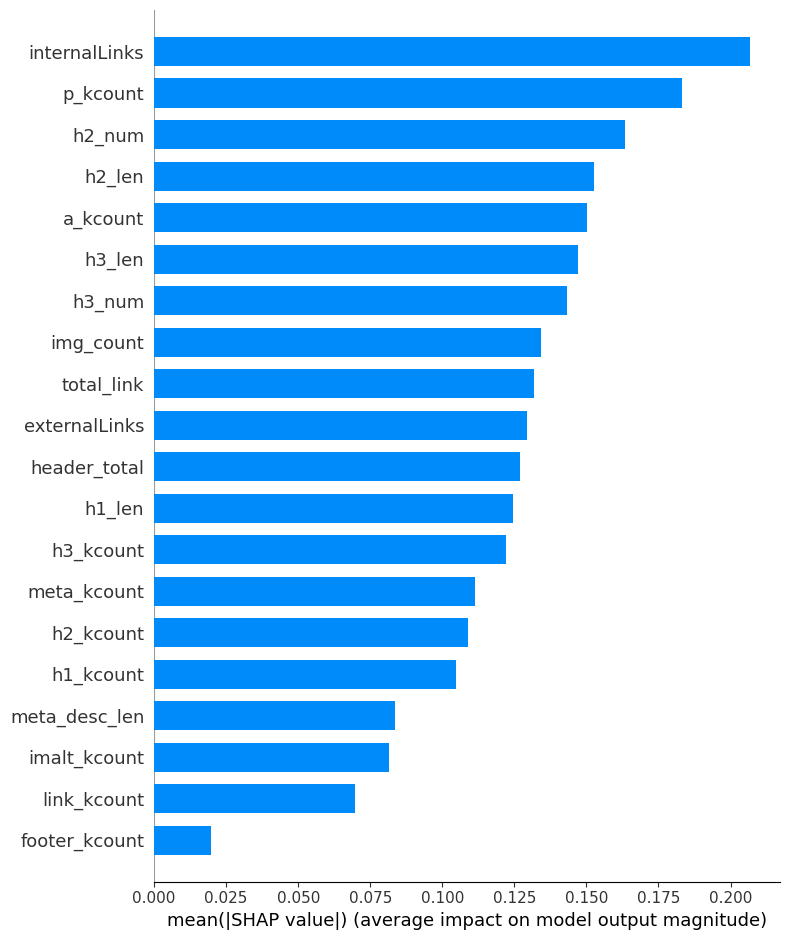

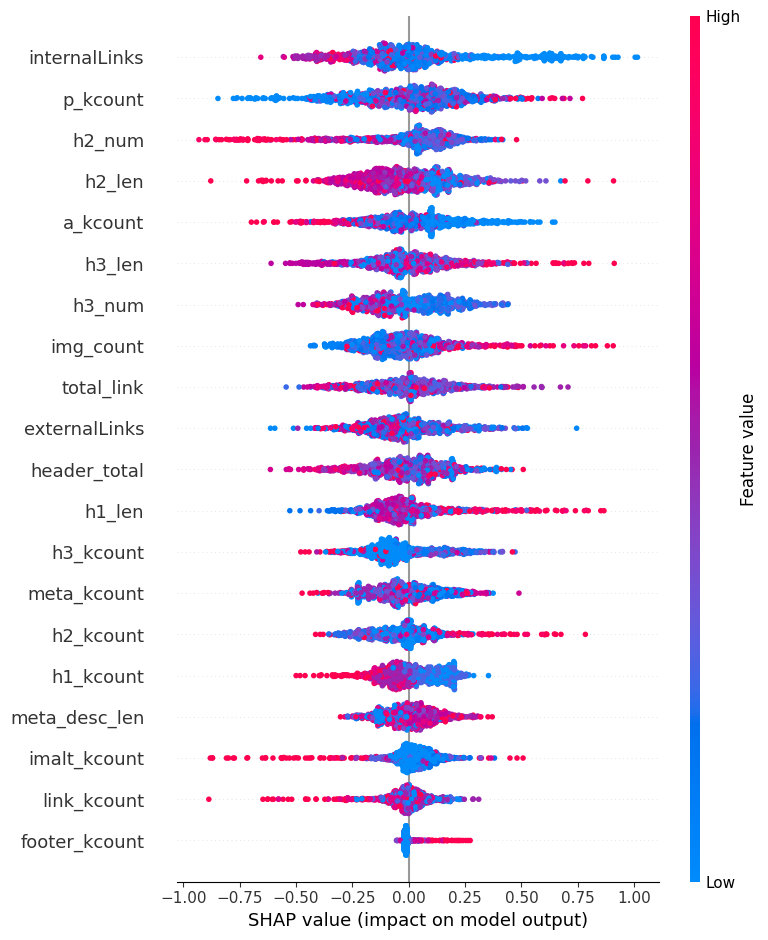

In [ ]:
generate_shap_plots(model_xg,xtrain,features,N=2000)

In [ ]:
model_xg.save_model('xgboost_ranker_model.json')

## **FEATURES ANALYSIS**

In [ ]:
#3. How does the total word count relate to the ranking?

sns.scatterplot(data=df, x='total_words', y='rank')
plt.title('Total Words vs. Ranking')
plt.gca().invert_yaxis()  # Lower ranks are better, so invert axis
plt.show()

In [ ]:
#What is the relationship between the number of H1 tags and webpage ranking?
sns.boxplot(x='rank', y='h1_num', data=df)
plt.title('Number of H1 Tags vs. Ranking')
plt.gca().invert_xaxis()  # Lower ranks are better
plt.show()

In [ ]:
#Do pages with more images tend to rank higher?
sns.lineplot(data=df, x='rank', y='img_count')
plt.title('Image Count vs. Ranking')
plt.show()

In [ ]:
#How does the internal to external link ratio affect the ranking?
df['link_ratio'] = df['internalLinks'] / (df['externalLinks'] + 1)  # Avoid division by zero
sns.boxplot(x='rank', y='link_ratio', data=df)
plt.title('Internal to External Link Ratio vs. Ranking')
plt.show()


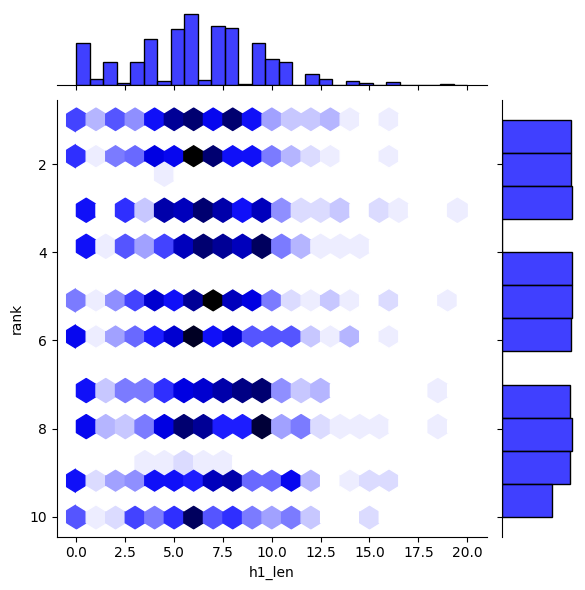

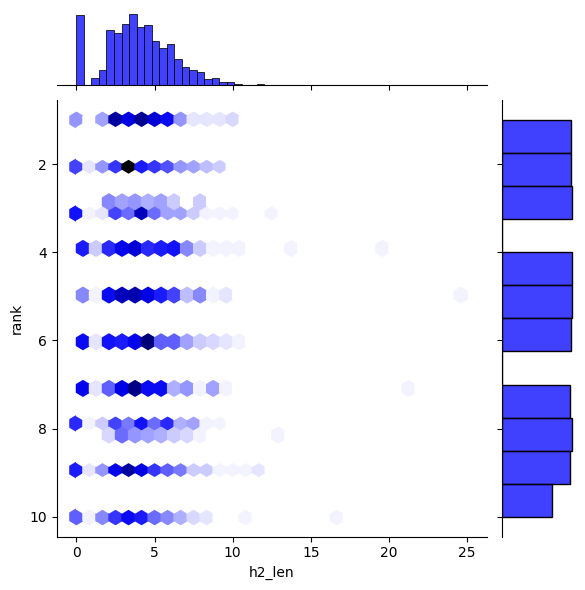

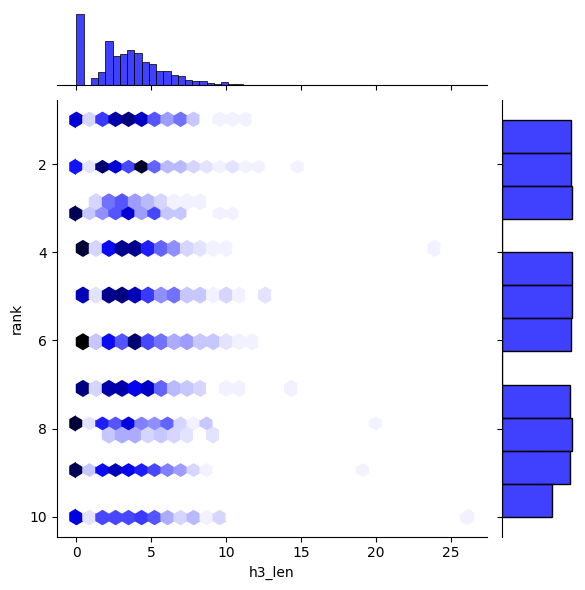

In [ ]:
#How the length of H1, H2, and H3 tags impact ranking?
headers = ['h1_len', 'h2_len', 'h3_len']
for header in headers:
    sns.jointplot(x=header, y='rank', data=df, kind='hex', color='blue')
    plt.gca().invert_yaxis()  # Invert y-axis to show higher ranks at the top


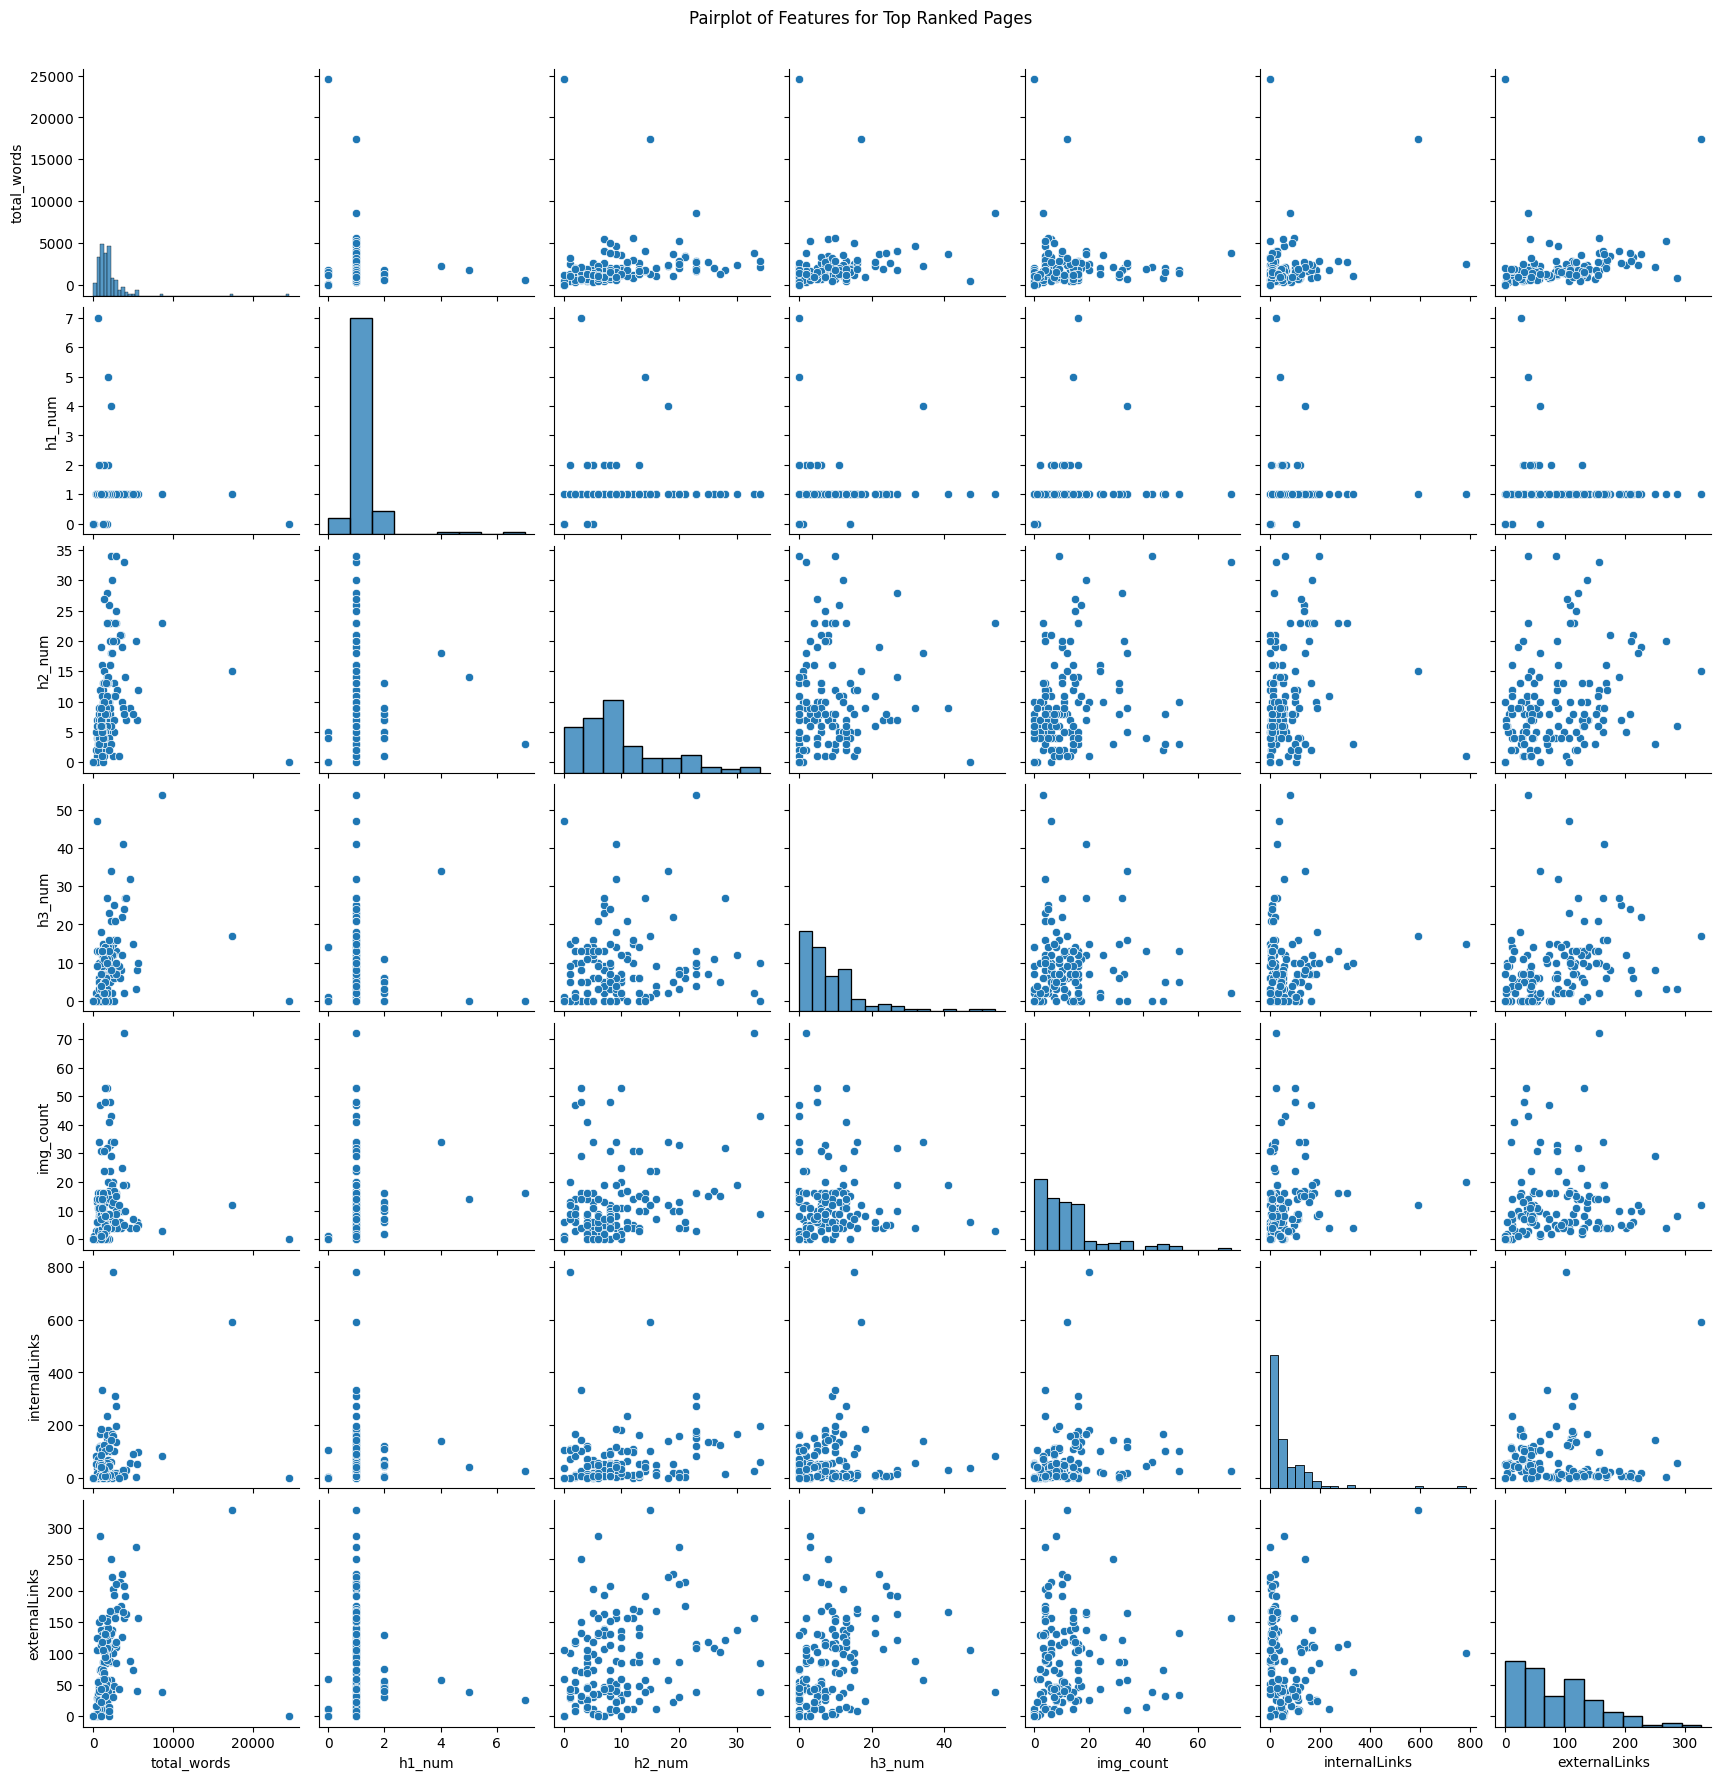

In [ ]:
#What are the common characteristics of top-ranked pages?
features_to_plot = ['total_words', 'h1_num', 'h2_num', 'h3_num', 'img_count', 'internalLinks', 'externalLinks']
top_ranked = df[df['rank'] <= df['rank'].quantile(0.1)]
sns.pairplot(top_ranked[features_to_plot])
plt.suptitle('Pairplot of Features for Top Ranked Pages', y=1.02)
plt.show()


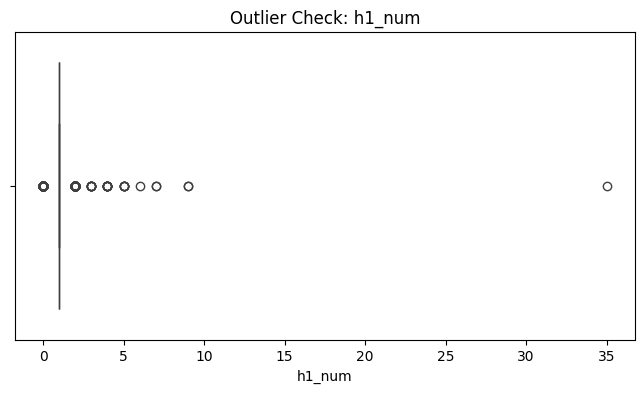

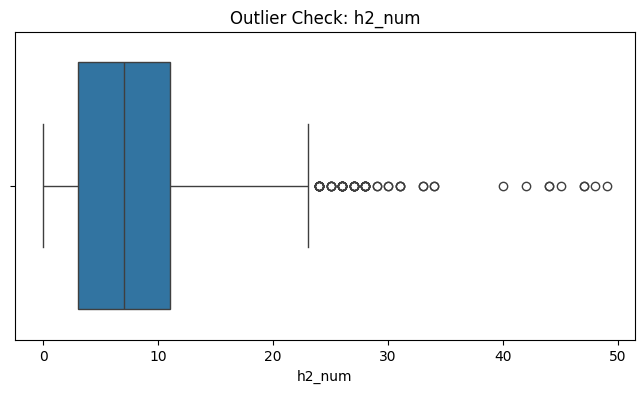

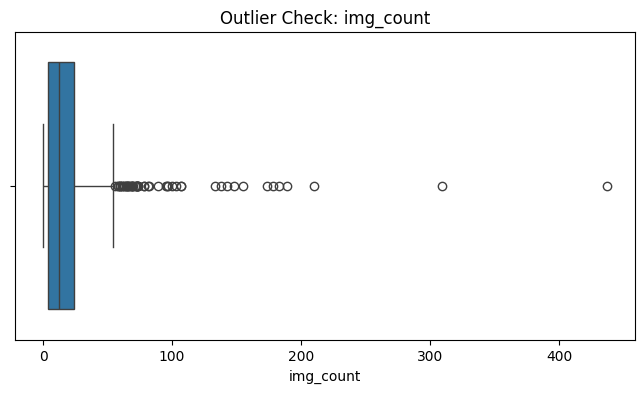

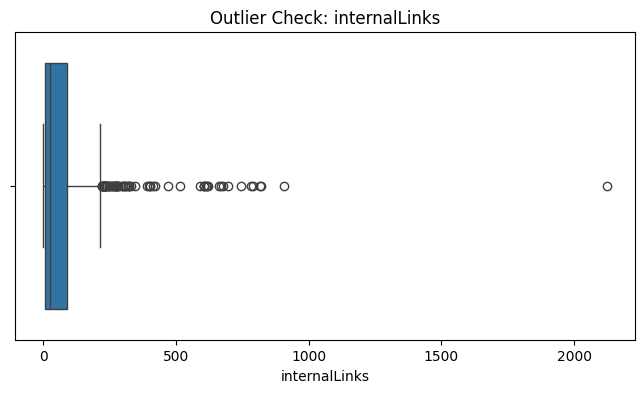

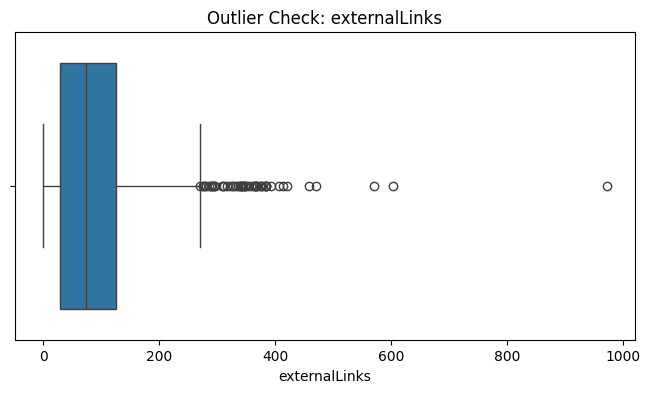

In [ ]:
#Are there significant outliers in SEO features that could affect the model?
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Outlier Check: {feature}')
    plt.show()

In [ ]:
#mpact of Keyword Usage in Headers on Rankings
sns.scatterplot(data=df, x='h1_kcount', y='rank', label='H1')
sns.scatterplot(data=df, x='h2_kcount', y='rank', label='H2')
sns.scatterplot(data=df, x='h3_kcount', y='rank', label='H3')
plt.gca().invert_yaxis()  # Higher ranks are better
plt.legend()
plt.title('Keyword Counts in Headers vs. Ranking')
plt.show()

In [ ]:
#Analysis of Meta Description Length and Ranking
sns.lineplot(data=df, x='rank', y='meta_desc_len')
plt.title('Meta Description Length vs. Ranking')
plt.show()

In [ ]:
#Clustering Analysis to Identify Segments of Web Pages
#Use clustering to find patterns or groups of web pages with similar SEO characteristics.

from sklearn.cluster import KMeans

# Use a subset of features for clustering
cluster_features = ['total_words', 'img_count', 'internalLinks', 'externalLinks', 'h1_kcount']
kmeans = KMeans(n_clusters=4, random_state=0).fit(df[cluster_features])
df['cluster'] = kmeans.labels_

sns.pairplot(df, hue='cluster', vars=cluster_features)
plt.title('Cluster Analysis of Web Pages')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
sns.pairplot(df[['internalLinks', 'a_kcount', 'p_kcount', 'total_words', 'h3_len', 'rank']], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=3)
plt.suptitle('Interaction Between Top SEO Features')
plt.show()

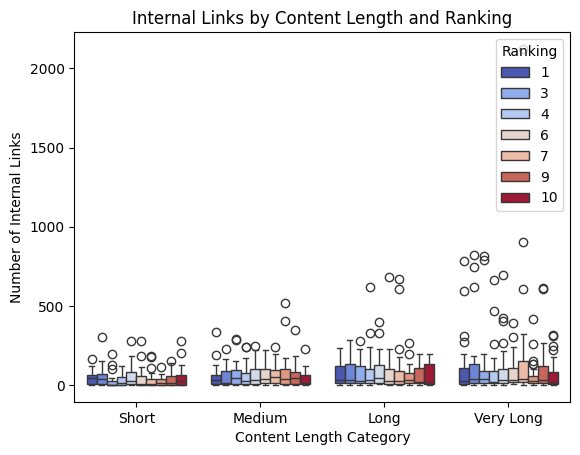

In [ ]:
# Categorize total words into bins for better analysis
df['content_length_category'] = pd.qcut(df['total_words'], 4, labels=['Short', 'Medium', 'Long', 'Very Long'])

# Create a boxplot to visualize the relationship between content length categories, internal links, and ranking
sns.boxplot(x='content_length_category', y='internalLinks', hue='rank', palette='coolwarm', data=df)
plt.title('Internal Links by Content Length and Ranking')
plt.xlabel('Content Length Category')
plt.ylabel('Number of Internal Links')
plt.legend(title='Ranking', loc='upper right')
plt.show()


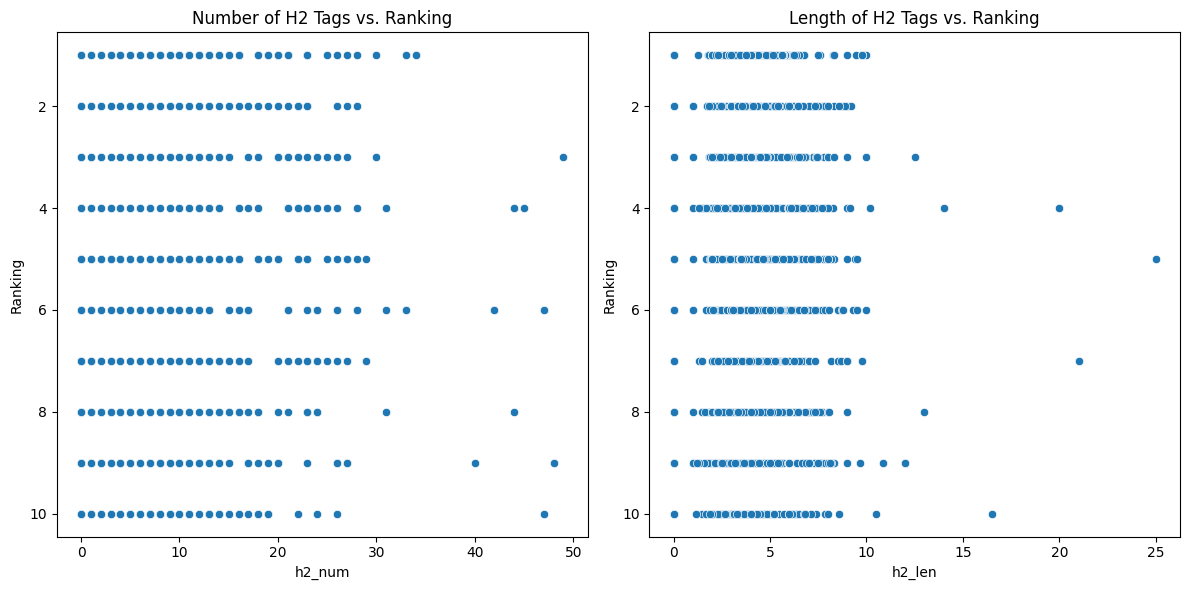

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x='h2_num', y='rank', ax=axs[0], data=df)
axs[0].set_title('Number of H2 Tags vs. Ranking')
axs[0].set_ylabel('Ranking')
axs[0].invert_yaxis()

sns.scatterplot(x='h2_len', y='rank', ax=axs[1], data=df)
axs[1].set_title('Length of H2 Tags vs. Ranking')
axs[1].set_ylabel('Ranking')
axs[1].invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
sns.scatterplot(x='a_kcount', y='rank', data=df, color='red')
plt.title('Anchor Keyword Count vs. Ranking')
plt.xlabel('Anchor Keyword Count')
plt.ylabel('Ranking')
plt.gca().invert_yaxis()
plt.show()


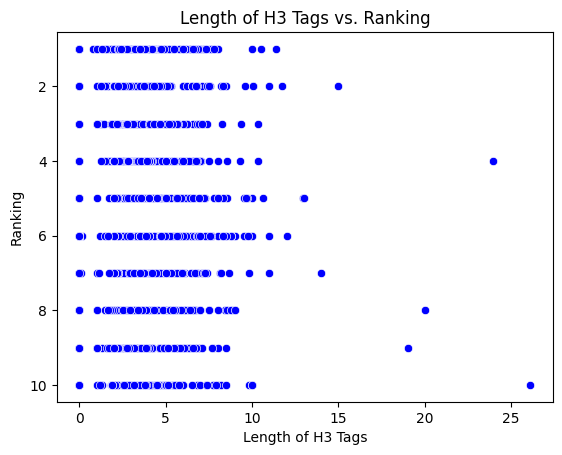

In [ ]:
sns.scatterplot(x='h3_len', y='rank', data=df, color='blue')
plt.title('Length of H3 Tags vs. Ranking')
plt.xlabel('Length of H3 Tags')
plt.ylabel('Ranking')
plt.gca().invert_yaxis()
plt.show()


#**Internal Links**

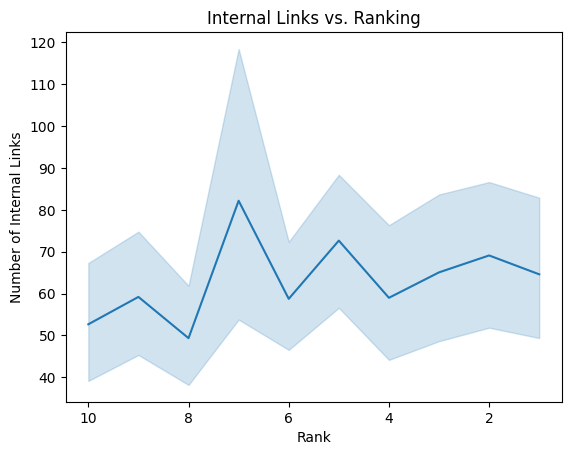

In [ ]:
#How does the number of internal links vary by ranking?
sns.lineplot(data=df, x='rank', y='internalLinks')
plt.title('Internal Links vs. Ranking')
plt.xlabel('Rank')
plt.ylabel('Number of Internal Links')
plt.gca().invert_xaxis()  # Higher rank (closer to 1) is better
plt.show()


<ipython-input-65-817081d79f74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_internal_links.index, y=avg_internal_links.values, palette='coolwarm')


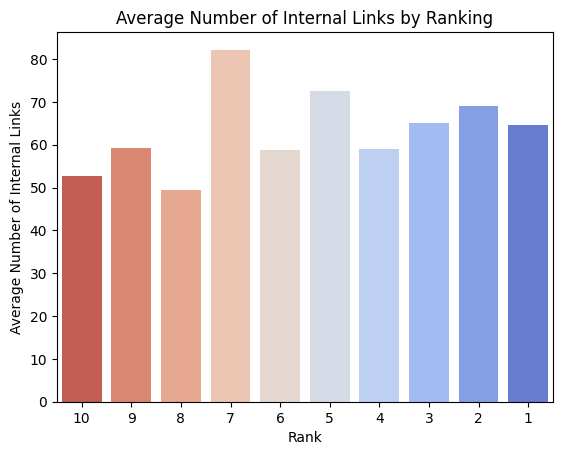

In [ ]:
avg_internal_links = df.groupby('rank')['internalLinks'].mean()
sns.barplot(x=avg_internal_links.index, y=avg_internal_links.values, palette='coolwarm')
plt.title('Average Number of Internal Links by Ranking')
plt.xlabel('Rank')
plt.ylabel('Average Number of Internal Links')
plt.gca().invert_xaxis()
plt.show()

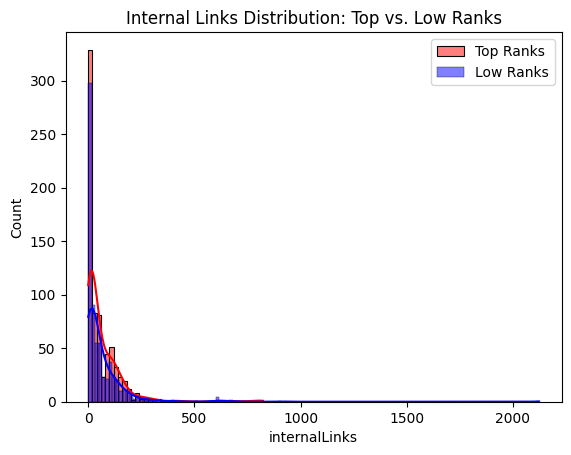

In [ ]:
#How does the internal link structure compare between top-ranked and lower-ranked pages?
top_ranks = df[df['rank'] <= 5]
low_ranks = df[df['rank'] > 5]
sns.histplot(top_ranks['internalLinks'], color="red", label='Top Ranks', kde=True)
sns.histplot(low_ranks['internalLinks'], color="blue", label='Low Ranks', kde=True)
plt.title('Internal Links Distribution: Top vs. Low Ranks')
plt.legend()
plt.show()

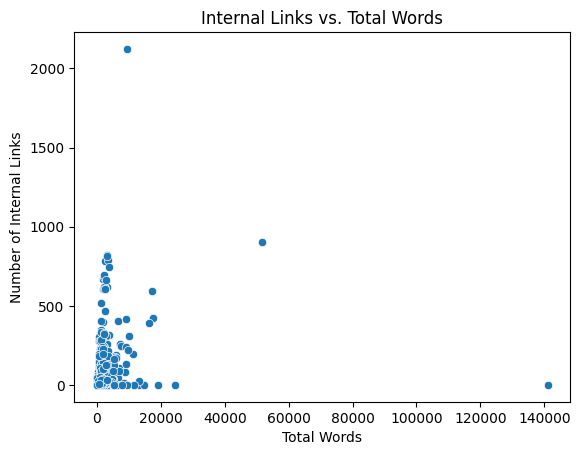

In [ ]:
#Does the number of internal links correlate with the total content length?
sns.scatterplot(x='total_words', y='internalLinks', data=df)
plt.title('Internal Links vs. Total Words')
plt.xlabel('Total Words')
plt.ylabel('Number of Internal Links')
plt.show()

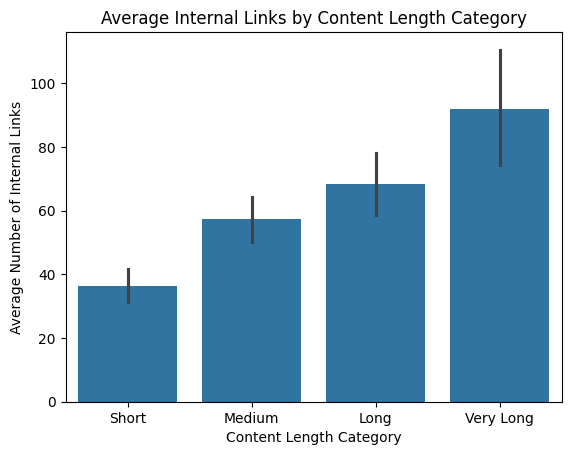

In [ ]:
#Is there a trend in the average number of internal links over different content categories?
df['content_category'] = pd.qcut(df['total_words'], 4, labels=['Short', 'Medium', 'Long', 'Very Long'])
sns.barplot(x='content_category', y='internalLinks', data=df, estimator=np.mean)
plt.title('Average Internal Links by Content Length Category')
plt.xlabel('Content Length Category')
plt.ylabel('Average Number of Internal Links')
plt.show()

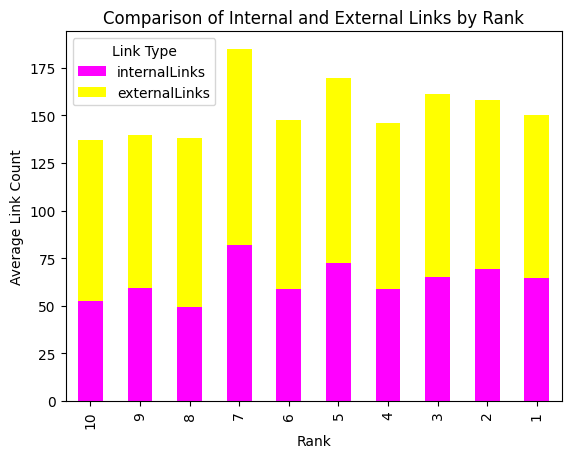

In [ ]:
avg_links = df.groupby('rank')[['internalLinks', 'externalLinks']].mean()
avg_links.plot(kind='bar', stacked=True, colormap='spring')
plt.title('Comparison of Internal and External Links by Rank')
plt.xlabel('Rank')
plt.ylabel('Average Link Count')
plt.gca().invert_xaxis()
plt.legend(title='Link Type')
plt.show()


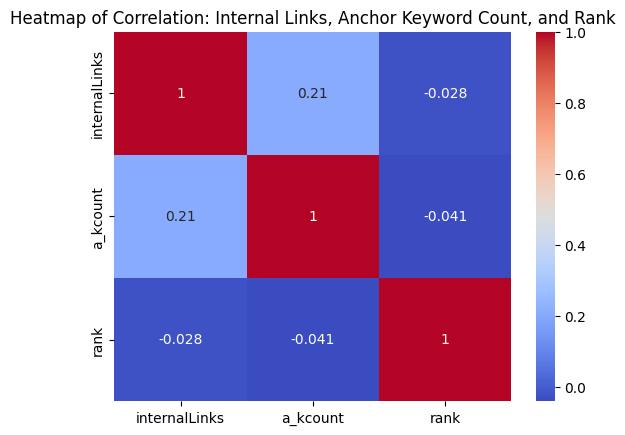

In [ ]:
sns.heatmap(df[['internalLinks', 'a_kcount', 'rank']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation: Internal Links, Anchor Keyword Count, and Rank')
plt.show()

# **Paragraph keyword count and Anchor keyword count**

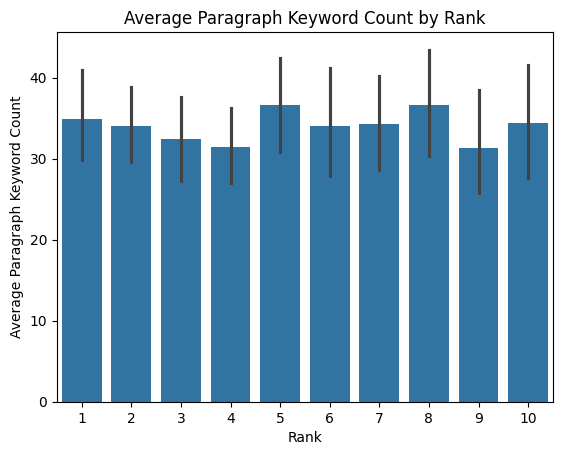

In [ ]:
#How does paragraph keyword count vary across different ranking levels?
sns.barplot(x='rank', y='p_kcount', data=df)
plt.title('Average Paragraph Keyword Count by Rank')
plt.xlabel('Rank')
plt.ylabel('Average Paragraph Keyword Count')
plt.show()

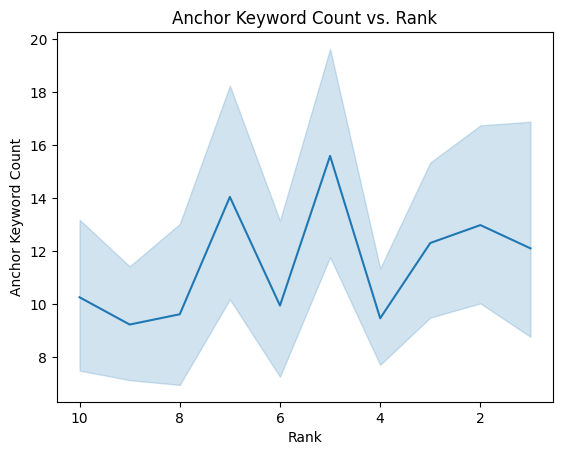

In [ ]:
#What is the relationship between anchor keyword count and ranking?
sns.lineplot(x='rank', y='a_kcount', data=df)
plt.title('Anchor Keyword Count vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Anchor Keyword Count')
plt.gca().invert_xaxis()  # Invert axis to show higher ranks on the left
plt.show()

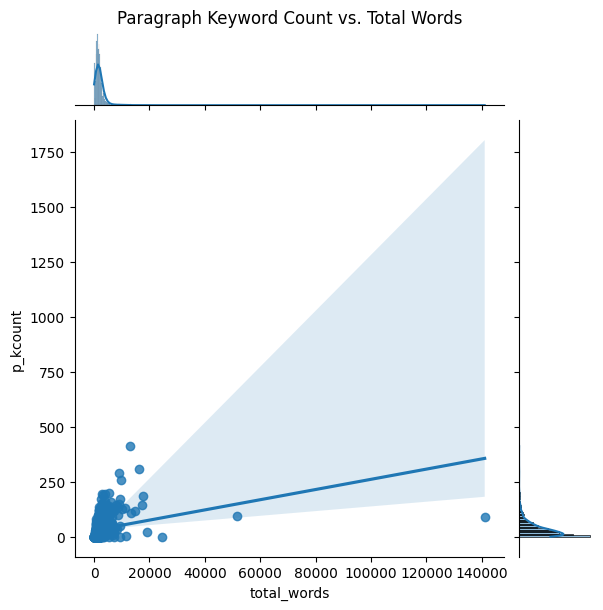

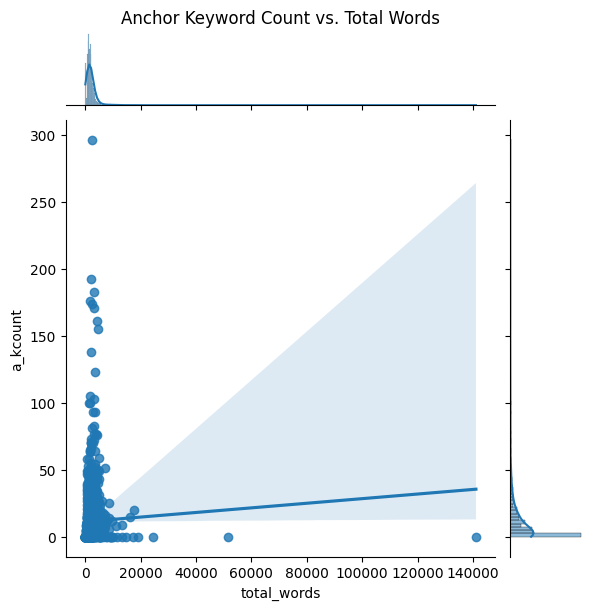

In [ ]:
# Convert p_kcount and a_kcount to numeric, setting errors='coerce' to handle non-numeric data
df['p_kcount'] = pd.to_numeric(df['p_kcount'], errors='coerce')
df['a_kcount'] = pd.to_numeric(df['a_kcount'], errors='coerce')

# Fill any resulting NaN values with 0 (or another appropriate value depending on your data)
df['p_kcount'].fillna(0, inplace=True)
df['a_kcount'].fillna(0, inplace=True)

# Now retry the joint plots
sns.jointplot(x='total_words', y='p_kcount', data=df, kind='reg')
plt.title('Paragraph Keyword Count vs. Total Words', pad=70)
plt.show()

sns.jointplot(x='total_words', y='a_kcount', data=df, kind='reg')
plt.title('Anchor Keyword Count vs. Total Words', pad=70)
plt.show()


In [ ]:
features_to_analyze = ['p_kcount', 'a_kcount', 'h1_num', 'h2_num']
corr_matrix = df[features_to_analyze].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')


Text(0.5, 1.0, 'Correlation matrix heatmap')

# **Number of H2 tags and Length of H2 tags**

<ipython-input-75-c9b3ff5783aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_h2_num.index, y=avg_h2_num.values, palette='coolwarm')


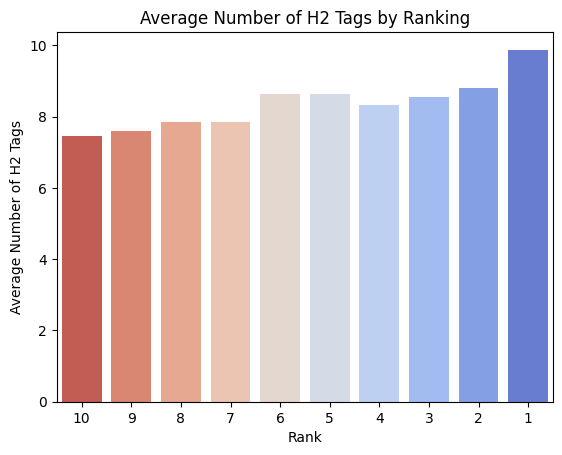

In [ ]:
#Average Number of H2 Tags by Ranking
avg_h2_num = df.groupby('rank')['h2_num'].mean()
sns.barplot(x=avg_h2_num.index, y=avg_h2_num.values, palette='coolwarm')
plt.title('Average Number of H2 Tags by Ranking')
plt.xlabel('Rank')
plt.ylabel('Average Number of H2 Tags')
plt.gca().invert_xaxis()
plt.show()

<ipython-input-76-903d189123b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='rank', y='h2_len', data=df, palette='viridis')


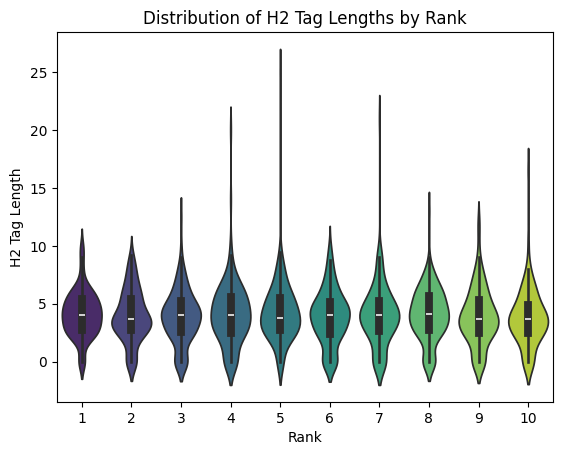

In [ ]:
#Distribution of H2 Tag Lengths by Ranking
sns.violinplot(x='rank', y='h2_len', data=df, palette='viridis')
plt.title('Distribution of H2 Tag Lengths by Rank')
plt.xlabel('Rank')
plt.ylabel('H2 Tag Length')
plt.show()

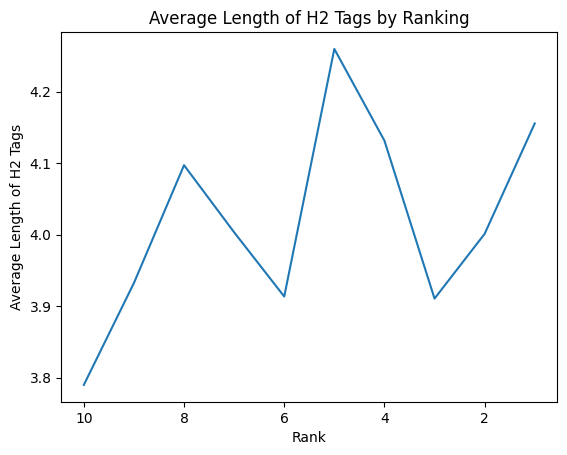

In [ ]:
avg_h2_len = df.groupby('rank')['h2_len'].mean()
sns.lineplot(x=avg_h2_len.index, y=avg_h2_len.values)
plt.title('Average Length of H2 Tags by Ranking')
plt.xlabel('Rank')
plt.ylabel('Average Length of H2 Tags')
plt.gca().invert_xaxis()
plt.show()

<ipython-input-78-41d10e89ffb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_h2_len.index, y=mean_h2_len.values, palette='magma')


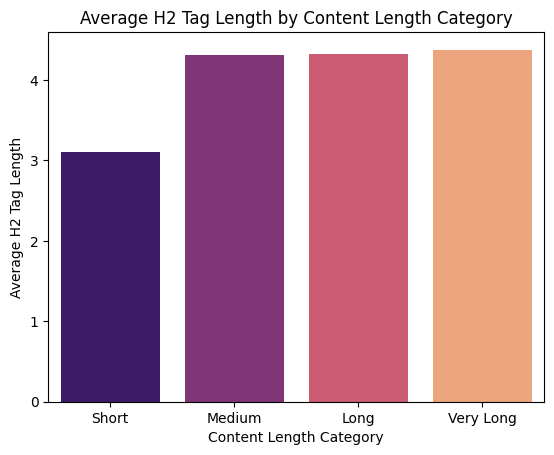

In [ ]:
df['content_length_category'] = pd.qcut(df['total_words'], 4, labels=['Short', 'Medium', 'Long', 'Very Long'])
mean_h2_len = df.groupby('content_length_category')['h2_len'].mean()
sns.barplot(x=mean_h2_len.index, y=mean_h2_len.values, palette='magma')
plt.title('Average H2 Tag Length by Content Length Category')
plt.xlabel('Content Length Category')
plt.ylabel('Average H2 Tag Length')
plt.show()

# **Others**

<ipython-input-79-62ca031dc33b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_h3_len.index, y=avg_h3_len.values, palette='Spectral')


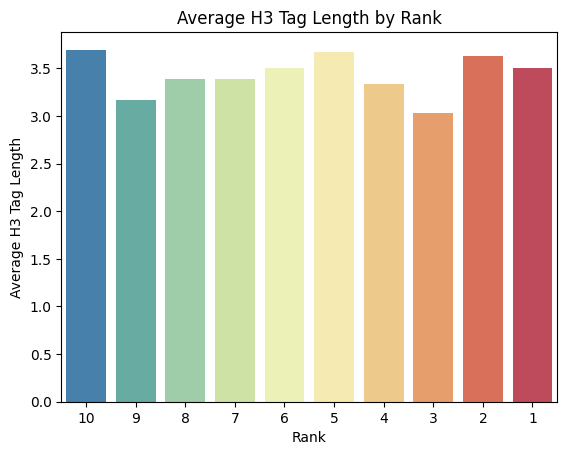

In [ ]:
#Average H3 Tag Length by Rank
avg_h3_len = df.groupby('rank')['h3_len'].mean()
sns.barplot(x=avg_h3_len.index, y=avg_h3_len.values, palette='Spectral')
plt.title('Average H3 Tag Length by Rank')
plt.xlabel('Rank')
plt.ylabel('Average H3 Tag Length')
plt.gca().invert_xaxis()
plt.show()


<ipython-input-80-9d700a094392>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_h3_len.index, y=avg_h3_len.values, palette='Spectral')


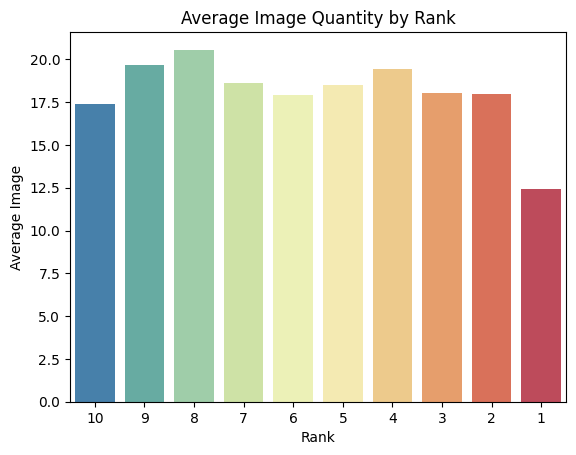

In [ ]:
#Average Image by Rank
avg_h3_len = df.groupby('rank')['img_count'].mean()
sns.barplot(x=avg_h3_len.index, y=avg_h3_len.values, palette='Spectral')
plt.title('Average Image Quantity by Rank')
plt.xlabel('Rank')
plt.ylabel('Average Image')
plt.gca().invert_xaxis()
plt.show()


<ipython-input-85-27e20537f879>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_meta_desc_len.index, y=avg_meta_desc_len.values, palette='Spectral')


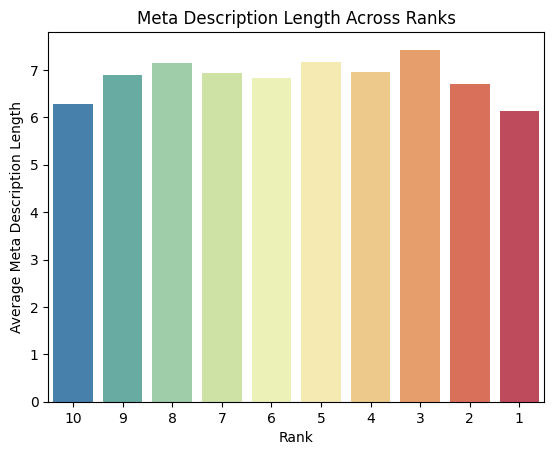

In [ ]:
#Meta Description Length Across Ranks
avg_meta_desc_len = df.groupby('rank')['meta_desc_len'].mean()
sns.barplot(x=avg_meta_desc_len.index, y=avg_meta_desc_len.values, palette='Spectral')
plt.title('Meta Description Length Across Ranks')
plt.xlabel('Rank')
plt.ylabel('Average Meta Description Length')
plt.gca().invert_xaxis()
plt.show()

<ipython-input-86-33bf4a690211>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_externalLinks.index, y=avg_externalLinks.values, palette='Spectral')


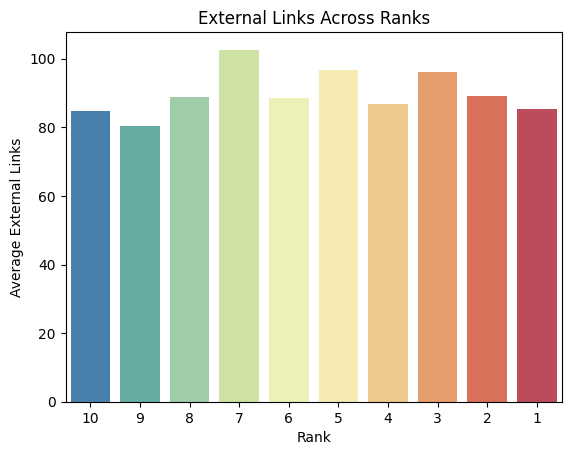

In [ ]:
#External Links Across Ranks
avg_externalLinks = df.groupby('rank')['externalLinks'].mean()
sns.barplot(x=avg_externalLinks.index, y=avg_externalLinks.values, palette='Spectral')
plt.title('External Links Across Ranks')
plt.xlabel('Rank')
plt.ylabel('Average External Links')
plt.gca().invert_xaxis()
plt.show()

In [ ]:
#Stacked Bar Chart of H1, H2, H3 Tag Usage
grouped = df.groupby('rank').agg({'h1_len': 'mean', 'h2_len': 'mean', 'h3_len': 'mean'})
grouped.plot(kind='bar', stacked=True, colormap='autumn')
plt.title('Stacked Bar Chart of H1, H2, H3 Tag Usage by Rank')
plt.xlabel('Rank')
plt.ylabel('Average Length')
plt.show()

In [ ]:
#Line Chart of Meta Keyword Count Trends
sns.lineplot(x='rank', y='meta_kcount', data=df, marker='o', linestyle='-', color='purple')
plt.title('Trend of Meta Keyword Count by Rank')
plt.xlabel('Rank')
plt.ylabel('Meta Keyword Count')
plt.gca().invert_xaxis()
plt.show()